In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import MultipleLocator
import seaborn as sns; sns.set()
sns.__version__

'0.11.1'

In [2]:
sns.set_style("ticks", {"xtick.major.size":15,"ytick.major.size":15})

plt.rc('font', family='DejaVu Sans') 
# This should be replaced with Helvetica; 
# See https://stackoverflow.com/questions/42097053/matplotlib-cannot-find-basic-fonts
plt.rcParams['pdf.fonttype'] = 42

%config InlineBackend.figure_format = 'retina'

In [3]:
df_pair_1985_2009 = pd.read_pickle("/data/interdisciplinarity/df_pair_1985_2009.pkl")
df_grant_1985_2009 = pd.read_pickle("/data/interdisciplinarity/df_grant_1985_2009.pkl")

In [4]:
import pickle

with open('/data/interdisciplinarity/df_paper_grant_stat.pkl', 'rb') as f:
    df_paper_grant_stat = pickle.load(f)
    
with open('/data/interdisciplinarity/df_c_from_own_fos.pkl', 'rb') as f:
    df_c_from_own_fos = pickle.load(f)

In [5]:
# Source: http://www.cookbook-r.com/Graphs/Plotting_means_and_error_bars_%28ggplot2%29/
# Produces count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   conf_interval: the percent range of the confidence interval (default is 95%)

import scipy as sp
from scipy.stats import t

def summarySE(data, measurevar, groupvars, conf_interval=0.95):
    def std(s):
        return np.std(s, ddof=1)
    def stde(s):
        return std(s) / np.sqrt(len(s))
    def ci(s):
        # Confidence interval multiplier for standard error
        # Calculate t-statistic for confidence interval: 
        # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
        ciMult = t.ppf(conf_interval/2.0 + .5, len(s)-1)
        return stde(s)*ciMult
    def ciUpper(s):
        return np.mean(s)+ci(s)
    def ciLower(s):
        return np.mean(s)-ci(s)
    
    data = data[groupvars+measurevar].groupby(groupvars).agg([len, np.mean, std, stde, ciUpper, ciLower, ci])

    data.reset_index(inplace=True)

    data.columns = groupvars+['_'.join(col).strip() for col in data.columns.values[len(groupvars):]]

    return data

## Across Disciplines

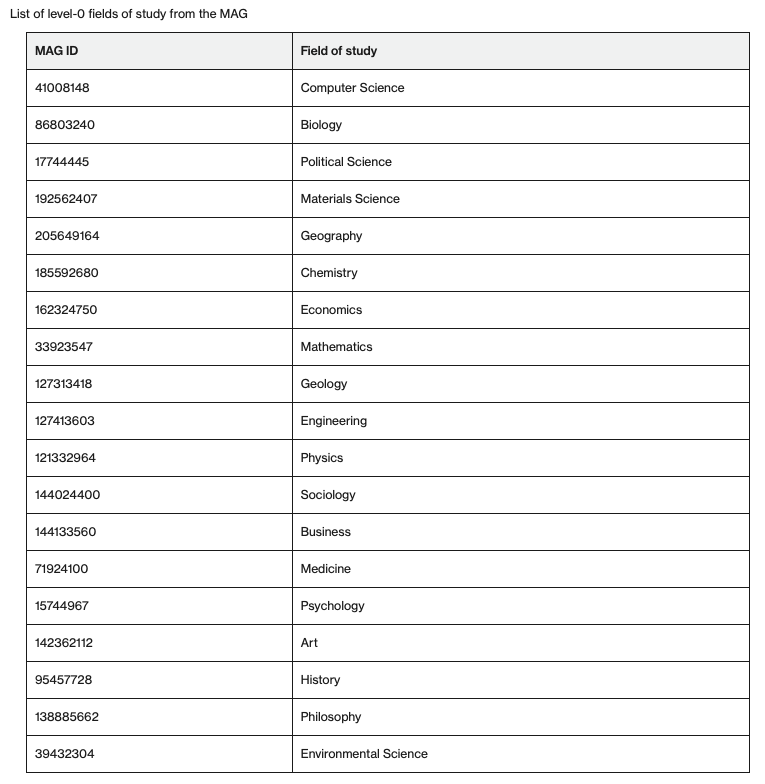

In [6]:
df_pair_1985_2009['paper_fos'] = df_pair_1985_2009['paper_fos'].apply(lambda x: f'{x:.0f}').astype(int, errors='ignore').apply(str)

In [7]:
df_pair_1985_2009['paper_fos'].unique()

array(['121332964', '41008148', '33923547', '127413603', '127313418',
       '86803240', '192562407', '185592680', '71924100', '15744967',
       '39432304', '162324750', '144024400', '95457728', '17744445',
       'nan', '205649164', '138885662', '144133560', '142362112'],
      dtype=object)

In [8]:
import pickle

DIR = '/data/interdisciplinarity/LLDA/'
with open(DIR + 'd_grant2field-weight_lvl0.pkl', 'rb') as infile:
    d_grant2field = pickle.loads(infile.read())
    
with open(DIR + 'd_grant2field-weight_lvl1.pkl', 'rb') as infile:
    d_grant_weight = pickle.loads(infile.read())

In [85]:
for i in d_grant2field:
    print(max(d_grant2field[i], key=d_grant2field[i].get))
    break

144024400


In [18]:
df_grant_1985_2009['grant_fos'] = df_grant_1985_2009['grant_id'].apply(lambda x: max(d_grant2field[x], key=d_grant2field[x].get))

['192562407', '144133560', '71924100', '127413603']


<ipython-input-59-578d7e0296da>:328: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


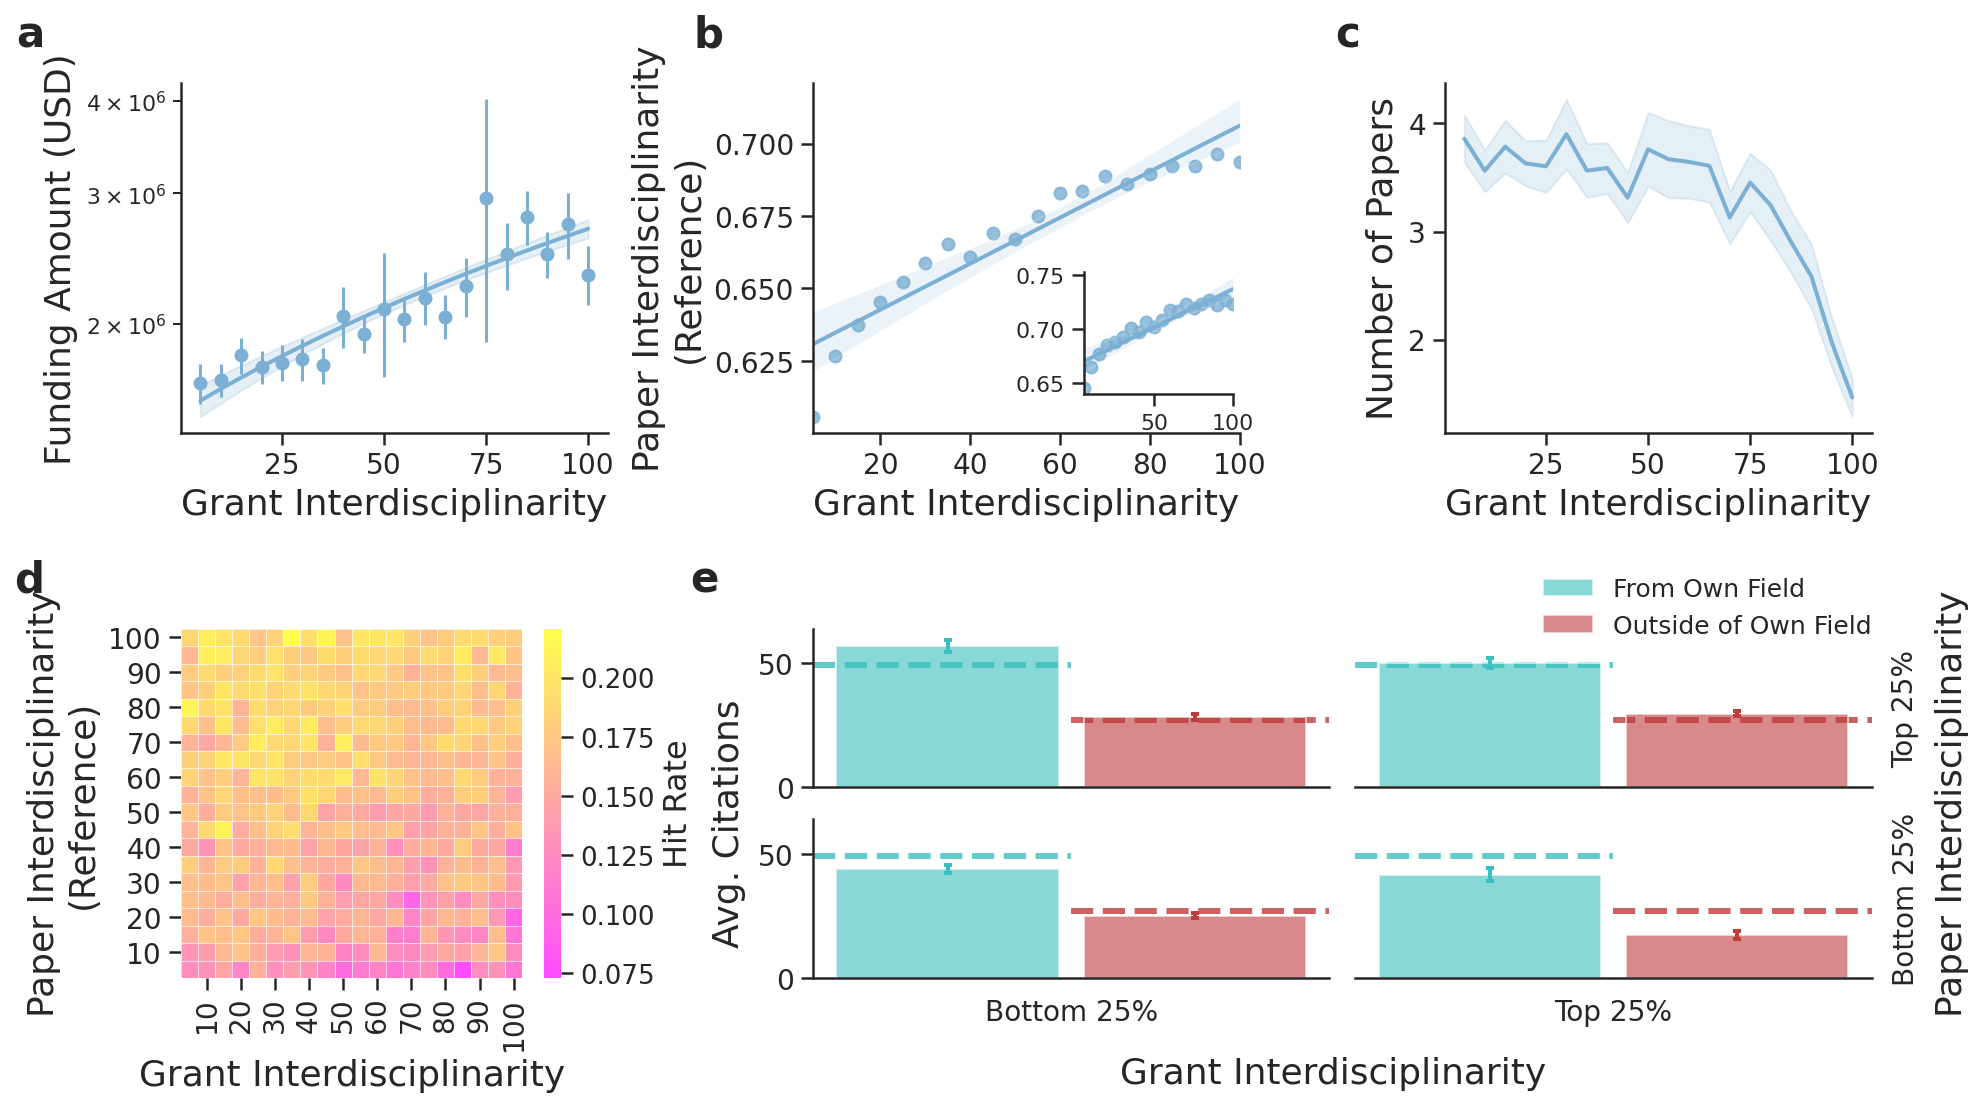

['33923547', '41008148']


<ipython-input-59-578d7e0296da>:328: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


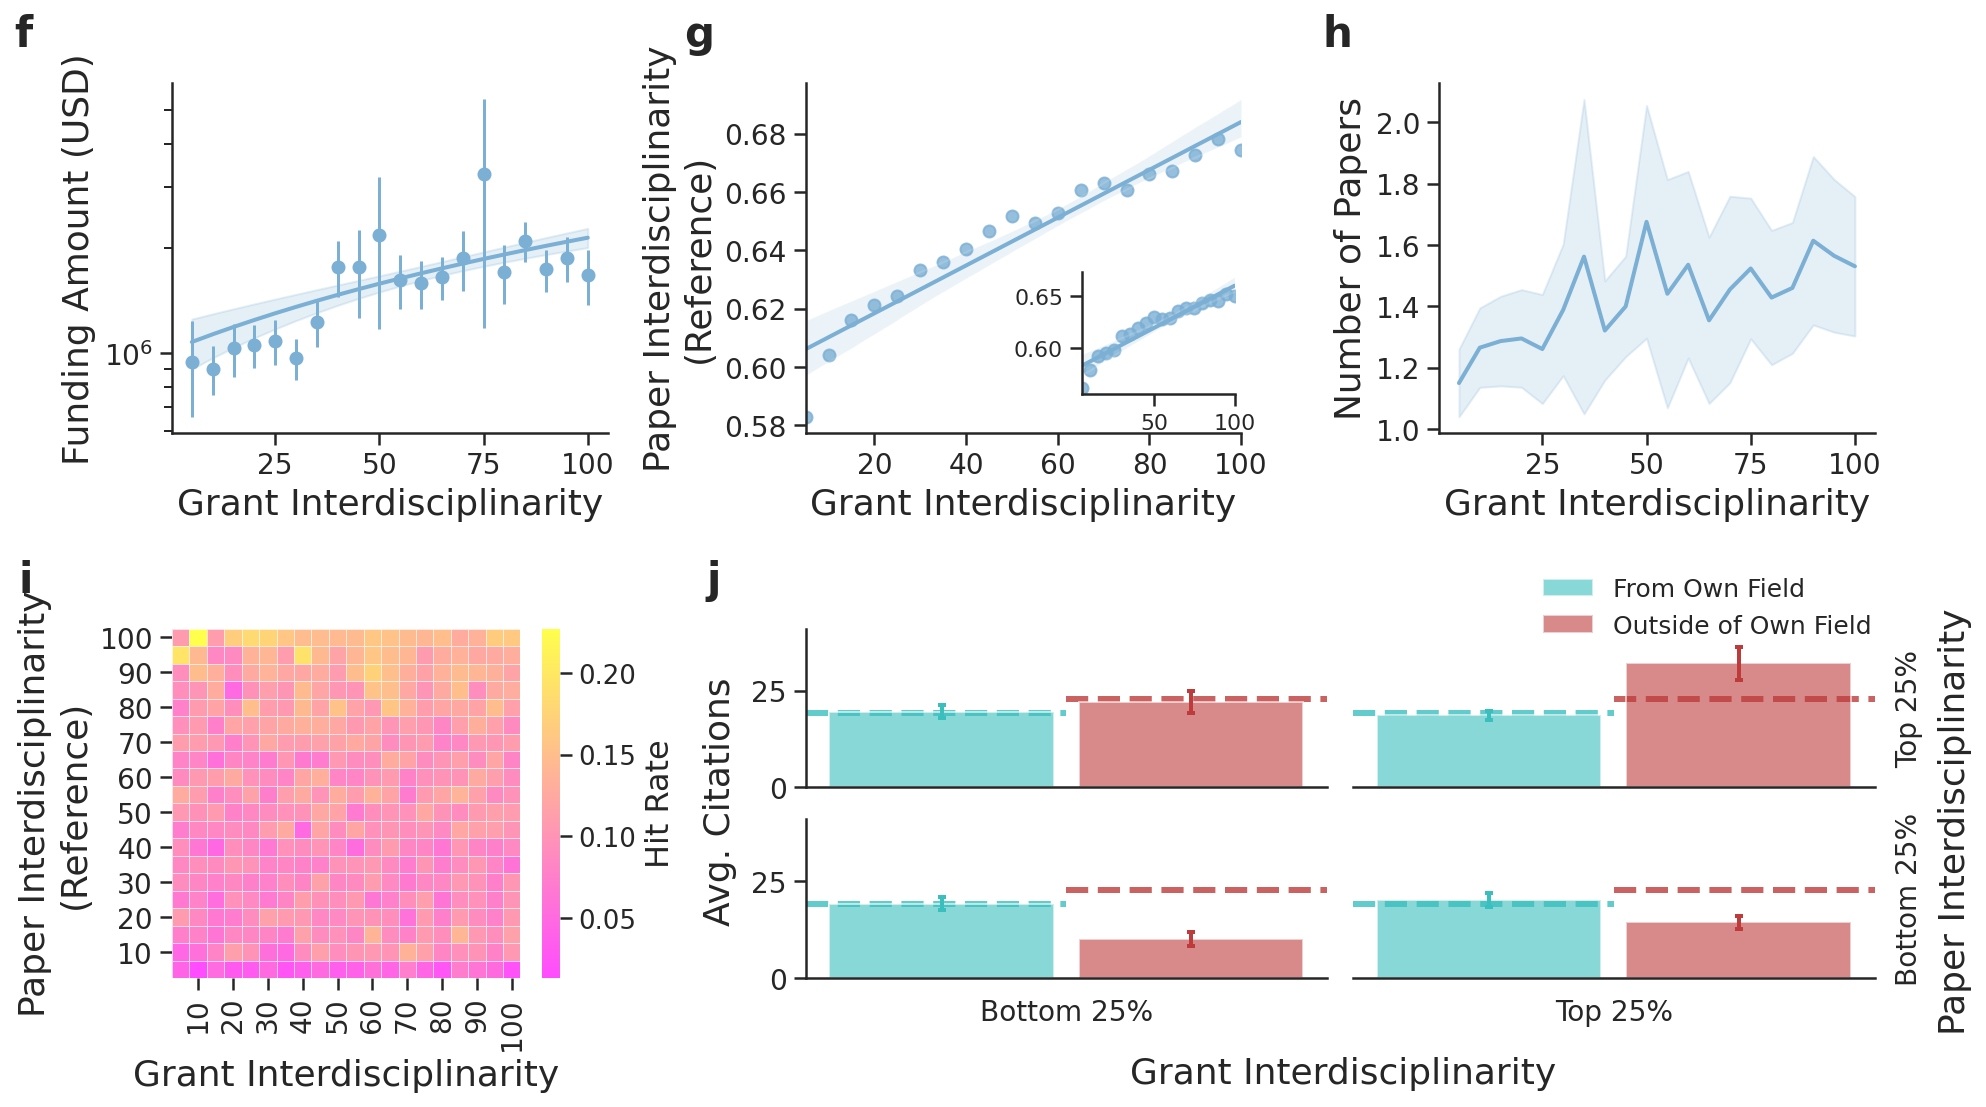

['95457728', '138885662', '142362112']


<ipython-input-59-578d7e0296da>:328: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


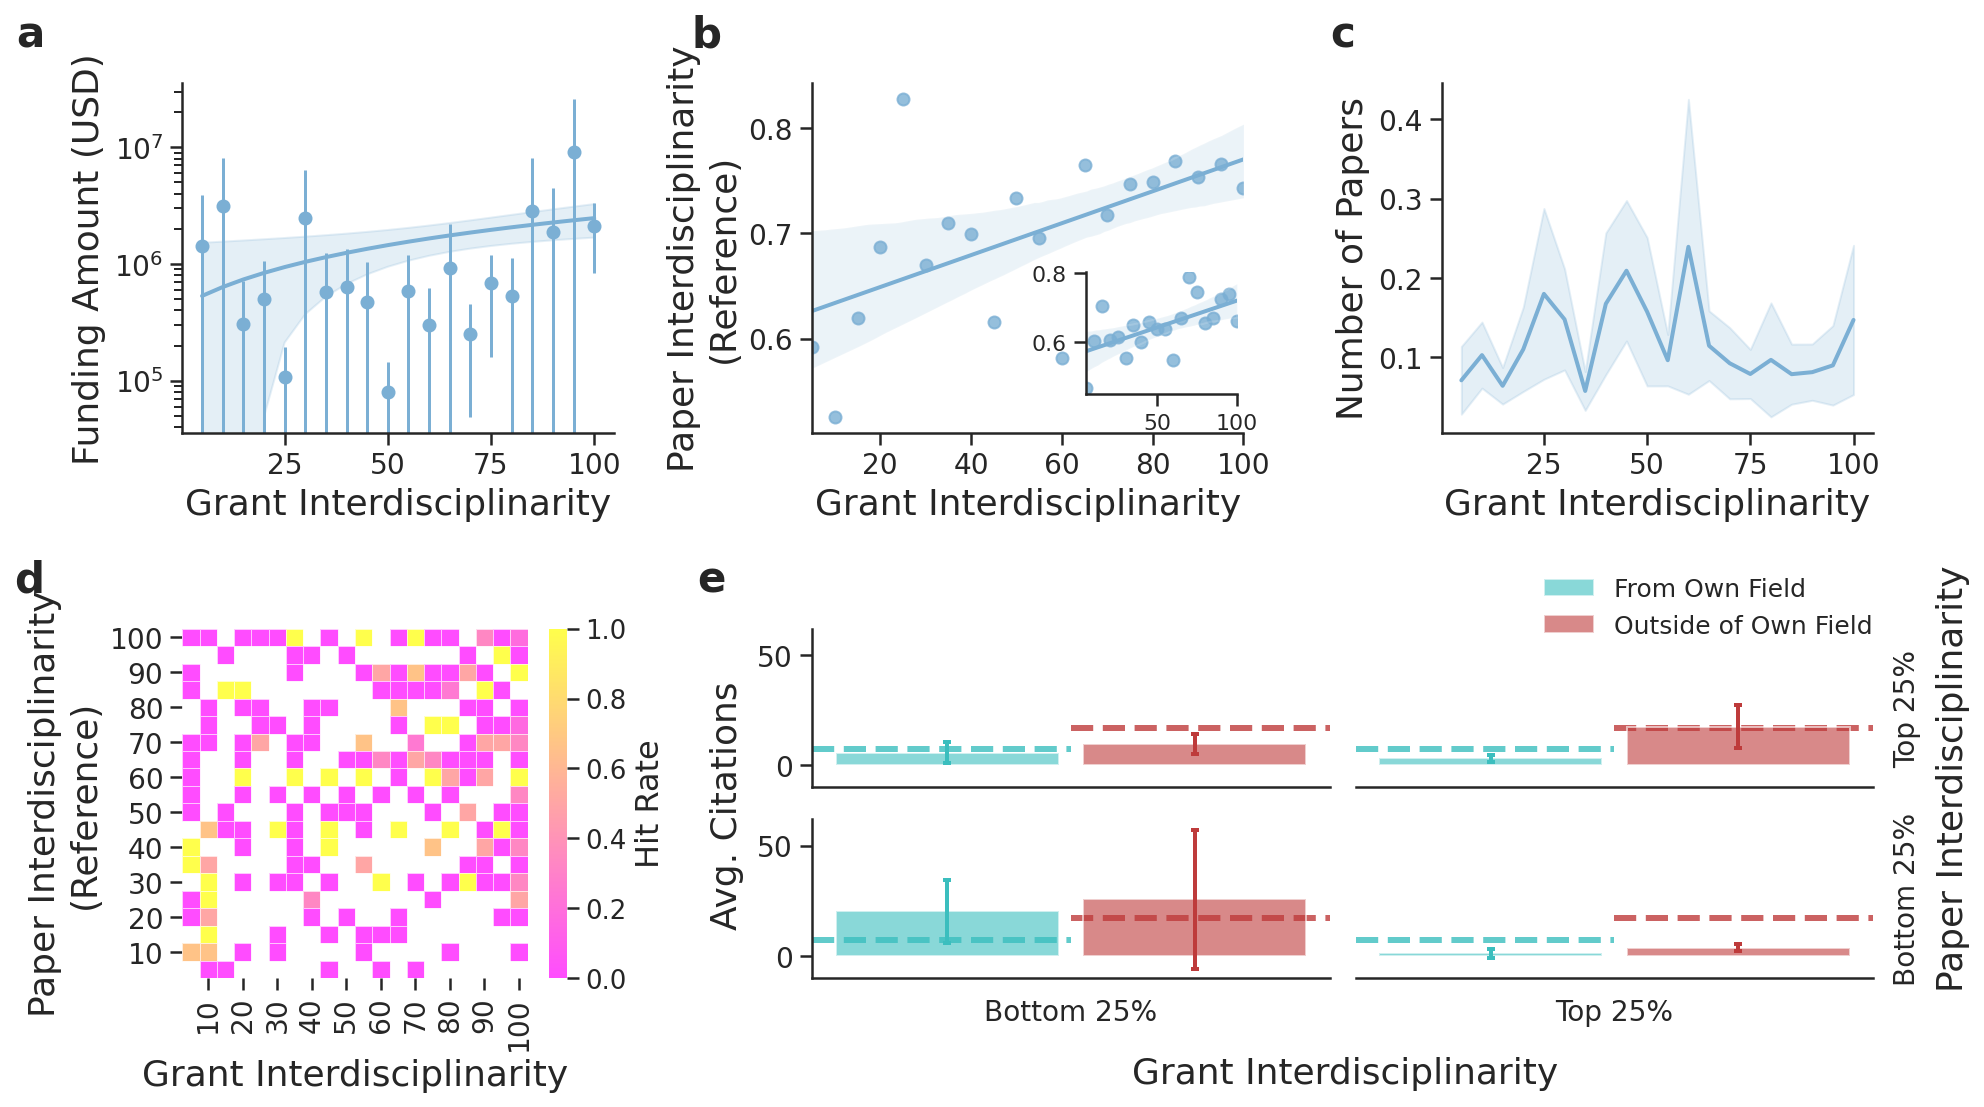

['17744445', '127313418', '205649164', '144024400', '15744967', '162324750']


<ipython-input-59-578d7e0296da>:328: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


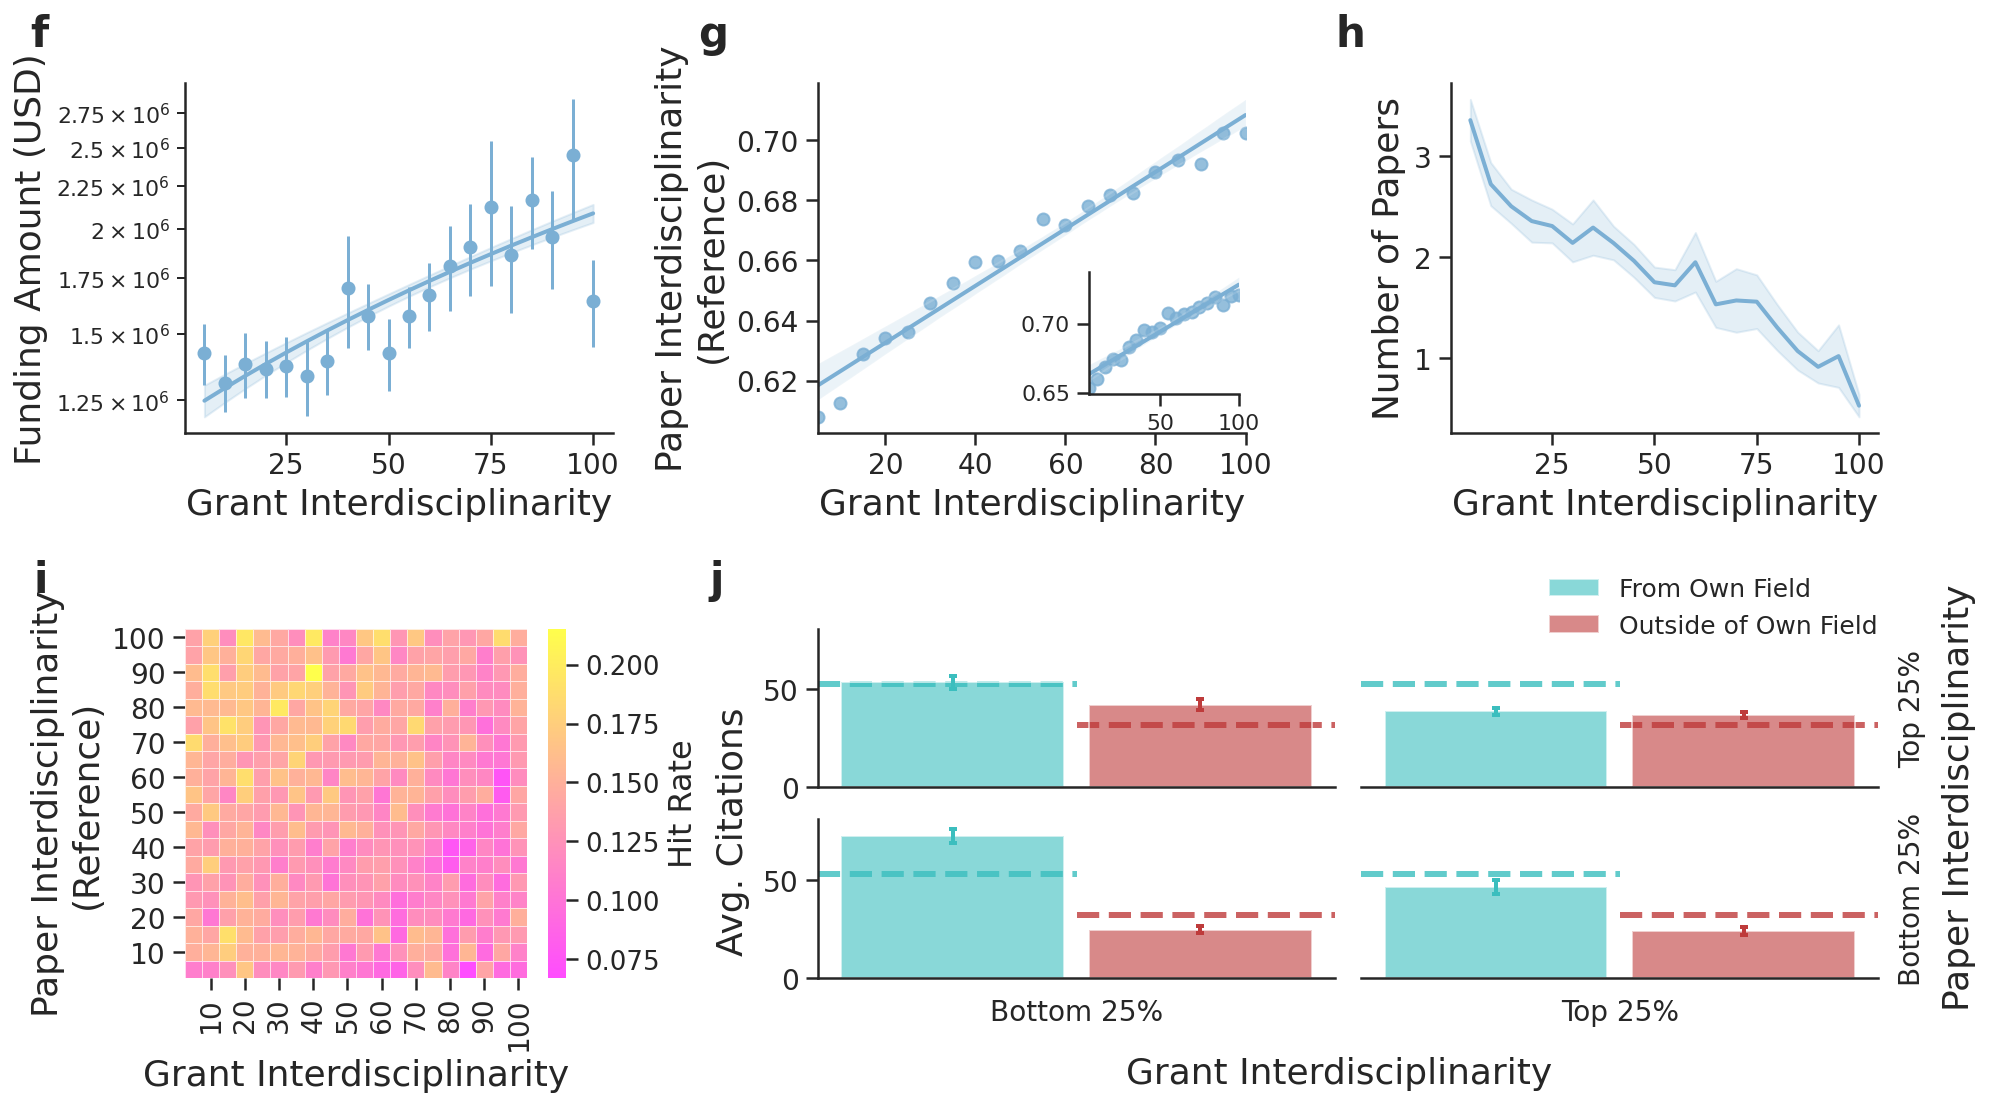

['185592680', '39432304', '86803240', '121332964']


<ipython-input-59-578d7e0296da>:328: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


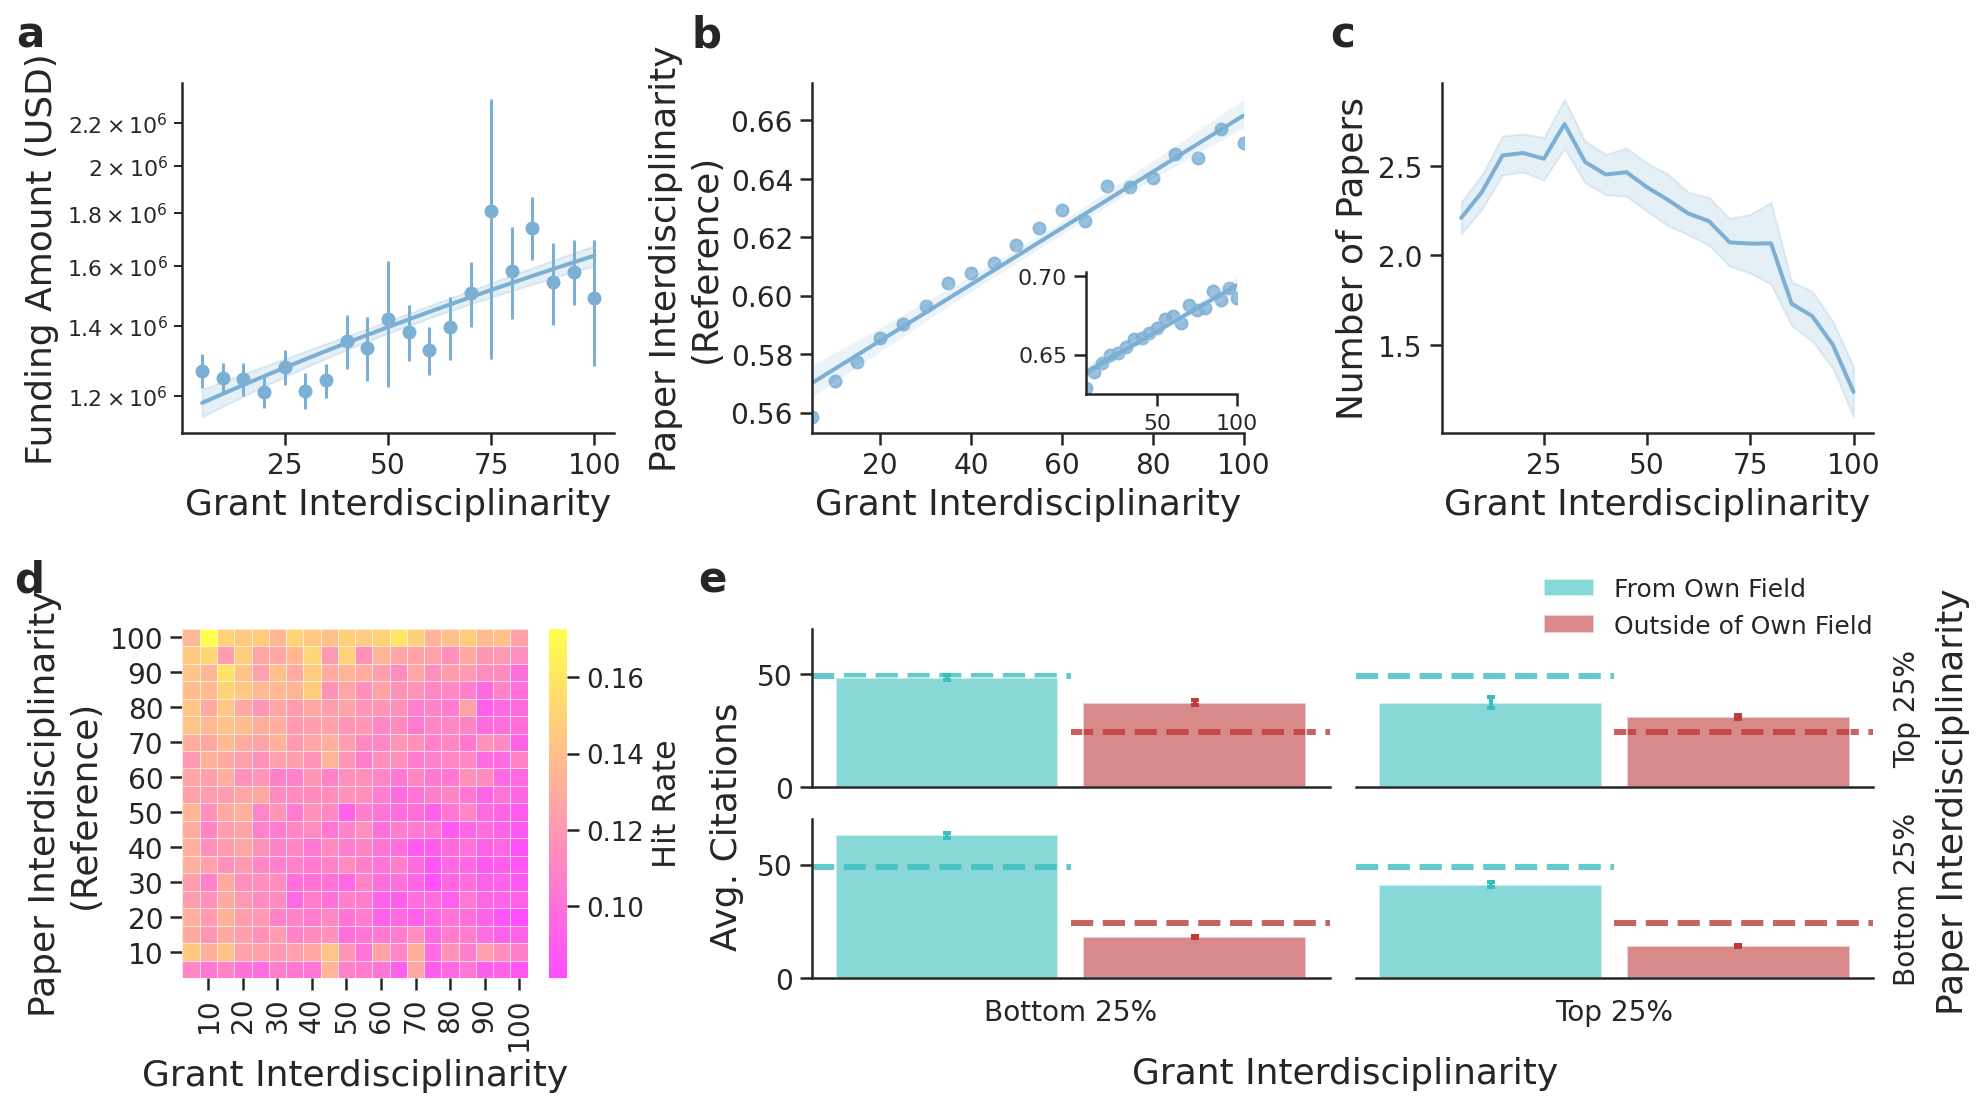

In [59]:
import statsmodels.api as sm
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
matplotlib.rcParams['agg.path.chunksize'] = 10000
import string


"""
Applied Science - Materials science, Business, Medicine, Engineering
['192562407','144133560','71924100','127413603']
Formal Science - Mathematics, Computer science
['33923547','41008148']
Humanities - History, Philosophy, Art
['95457728','138885662','142362112']
Social Science - Economics, Sociology, Political science, Psychology, Geology, Geography 
['17744445','127313418','205649164','144024400','15744967','162324750']
Natural Science - Chemistry, Biology, Physics, Environmental science 
['185592680','39432304','86803240','121332964']
"""
l_discipline = [['192562407','144133560','71924100','127413603'], #-Applied Sciences
                ['33923547','41008148'], #-Formal Sciences
                ['95457728','138885662','142362112'], #-Humanities
                ['17744445','127313418','205649164','144024400','15744967','162324750'], #-Social Sciences
                ['185592680','39432304','86803240','121332964']] #-Natural Sciences
l_subplot_label = list(string.ascii_lowercase[:10])

counter_subplot_label = 0
counter_fig = 0
for discipline in l_discipline:
    print(discipline)
    df_pair_subsample = df_pair_1985_2009[df_pair_1985_2009["paper_fos"].isin(discipline)]
    df_grant_subsample = df_grant_1985_2009[df_grant_1985_2009["grant_fos"].isin(discipline)]
    
    pd.options.mode.chained_assignment = None  # default='warn'
    df_pair_subsample['mag_id'] = df_pair_subsample['mag_id'].astype(str)
    
    #####----- a -----#####
    df_tmp = df_pair_subsample[['grant_id','funding_usd','grant_interdisciplinarity_interval']].drop_duplicates()
    funding_per_grantITD = summarySE(df_tmp, ['funding_usd'], ['grant_interdisciplinarity_interval'])

    X = sm.add_constant(df_tmp['grant_interdisciplinarity_interval'])
    ols_model = sm.OLS(df_tmp['funding_usd'], X, missing='drop')
    est = ols_model.fit()
    out = est.conf_int(alpha=0.05, cols=None)

    pred = est.get_prediction(X).summary_frame()
    pred['grant_interdisciplinarity_interval'] = df_tmp['grant_interdisciplinarity_interval']
    pred['ci'] = pred['mean_se']*1.96
    pred_y = summarySE(pred, ['mean'], ['grant_interdisciplinarity_interval'])
    pred_ci = summarySE(pred, ['mean_se'], ['grant_interdisciplinarity_interval'])

    #####----- b -----#####
    df_tmp = df_pair_subsample[['interdisciplinarity_reference','interdisciplinarity_citation','grant_interdisciplinarity_interval']]
    paperRefITD_per_grantITD = summarySE(df_tmp, ['interdisciplinarity_reference'], ['grant_interdisciplinarity_interval'])
    paperCitITD_per_grantITD = summarySE(df_tmp, ['interdisciplinarity_citation'], ['grant_interdisciplinarity_interval'])

    #####----- c -----#####
    df_tmp = df_grant_subsample[['grant_id','grant_interdisciplinarity_interval','num_paper']].drop_duplicates()
    numPaper_per_grantITD = summarySE(df_tmp, ['num_paper'], ['grant_interdisciplinarity_interval'])

    #####----- d -----#####
    df_tmp = df_pair_subsample[['grant_interdisciplinarity_interval','interdisciplinarity_reference_interval',
                      'c_hit_rate_5_lvl-0']].groupby(['grant_interdisciplinarity_interval',
                                                      'interdisciplinarity_reference_interval'], as_index=False).mean()
    df_heatmap = df_tmp.pivot('interdisciplinarity_reference_interval','grant_interdisciplinarity_interval',
                                  'c_hit_rate_5_lvl-0')

    df_heatmap.sort_index(level=0, ascending=False, inplace=True)

    #####----- e -----#####
    df_tmp = df_paper_grant_stat[(((df_paper_grant_stat['mean_grant_interdisciplinarity_quartile']==25)|
                                   (df_paper_grant_stat['mean_grant_interdisciplinarity_quartile']==100)) &
                                  ((df_paper_grant_stat['interdisciplinarity_reference_quartile']==25)|
                                   (df_paper_grant_stat['interdisciplinarity_reference_quartile']==100)))].copy()

    df_tmp[['mean_grant_interdisciplinarity_quartile','interdisciplinarity_reference_quartile']] = df_tmp[['mean_grant_interdisciplinarity_quartile','interdisciplinarity_reference_quartile']].astype(str)
    df_tmp['label_avg_grant_itd_n_paper_itd'] = df_tmp[['mean_grant_interdisciplinarity_quartile',
                                                        'interdisciplinarity_reference_quartile']].agg('&'.join, axis=1)

    df_tmp = df_tmp[df_tmp['mag_id'].isin(df_pair_subsample['mag_id'])]

    df_c_from_own_fos['mag_id'] = df_c_from_own_fos['mag_id'].astype(str)
    df_tmp = pd.merge(df_c_from_own_fos, df_tmp, on='mag_id')

    df_tmp = df_tmp[['label_io', 'c_from_own_fos', 'label_avg_grant_itd_n_paper_itd',
                     'mean_grant_interdisciplinarity_quartile','interdisciplinarity_reference_quartile']]

    c_per_grantITD_paperITD_FromOwnField = summarySE(df_tmp, ['c_from_own_fos'],
                                                     ['label_io','label_avg_grant_itd_n_paper_itd'])

    df_rand = summarySE(df_tmp, ['c_from_own_fos'], ['label_io'])
    rand_inside = float(df_rand[df_rand['label_io']=='Inside']['c_from_own_fos_mean'])
    rand_outside = float(df_rand[df_rand['label_io']=='Outside']['c_from_own_fos_mean'])
    max_ylim = int(max(c_per_grantITD_paperITD_FromOwnField['c_from_own_fos_mean']) +\
                max(c_per_grantITD_paperITD_FromOwnField['c_from_own_fos_ci']) + 5)
    min_ylim = 0
    if max(c_per_grantITD_paperITD_FromOwnField['c_from_own_fos_ci']) > max(c_per_grantITD_paperITD_FromOwnField['c_from_own_fos_mean']):
        min_ylim = int(max(c_per_grantITD_paperITD_FromOwnField['c_from_own_fos_mean']) -\
                       max(c_per_grantITD_paperITD_FromOwnField['c_from_own_fos_ci']) - 5)
    
    
    #####-------------#####
    
    
    fig = plt.figure(figsize=(14,8))
    gs = GridSpec(2, 3, figure=fig)

    #####----- a -----#####
    ax = fig.add_subplot(gs[0,0])

    x1 = funding_per_grantITD['grant_interdisciplinarity_interval']
    mu1 = funding_per_grantITD['funding_usd_mean']
    ci1 = funding_per_grantITD['funding_usd_ci']
    ax.errorbar(x1, mu1, yerr=ci1, fmt='o', color='#7bafd4')

    x2 = pred_y['grant_interdisciplinarity_interval']
    mu2 = pred_y['mean_mean']
    ci2 = pred_ci['mean_se_mean']
    ax.plot(x2, mu2, lw=2, color='#7bafd4')
    ax.fill_between(x2, mu2+ci2, mu2-ci2, alpha=0.2, color='#7bafd4')

    ax.set_ylabel('Funding Amount (USD)', fontsize=18)
    ax.set_yscale('log')
    ax.set_xlabel('Grant Interdisciplinarity', fontsize=18)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(-0.32, 1.2, l_subplot_label[counter_subplot_label], transform=ax.transAxes,
            fontsize=21, fontweight='bold', va='top', ha='right')
    counter_subplot_label += 1



    #####----- b -----#####
    ax = fig.add_subplot(gs[0,1])

    ax = sns.regplot(ax=ax, x='grant_interdisciplinarity_interval', y='interdisciplinarity_reference_mean',
                     line_kws={'linewidth':2}, color='#7bafd4', data=paperRefITD_per_grantITD)
    ax.set_ylabel('Paper Interdisciplinarity\n(Reference)', fontsize=18)
    ax.set_xlabel('Grant Interdisciplinarity', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=14)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    axins = inset_axes(ax, width="35%", height="35%", loc=4, 
                       bbox_to_anchor=(0.01,0.08,1,1), bbox_transform=ax.transAxes)
    axins = sns.regplot(ax=axins, x='grant_interdisciplinarity_interval', y='interdisciplinarity_citation_mean', 
                        line_kws={'linewidth':2}, color='#7bafd4', data=paperCitITD_per_grantITD)
    axins.set_ylabel('')
    axins.set_xlabel('')

    axins.spines['top'].set_visible(False)
    axins.spines['right'].set_visible(False)
    ax.text(-0.21, 1.2, l_subplot_label[counter_subplot_label], transform=ax.transAxes,
            fontsize=21, fontweight='bold', va='top', ha='right')
    counter_subplot_label += 1



    #####----- c -----#####
    ax = fig.add_subplot(gs[0,2])

    x = numPaper_per_grantITD['grant_interdisciplinarity_interval']
    mu = numPaper_per_grantITD['num_paper_mean']
    ci = numPaper_per_grantITD['num_paper_ci']

    ax.plot(x, mu, lw=2, color='#7bafd4')
    ax.fill_between(x, mu+ci, mu-ci, alpha=0.2, color='#7bafd4')

    ax.set_ylabel('Number of Papers', fontsize=18)
    ax.set_xlabel('Grant Interdisciplinarity', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=14)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(-0.2, 1.2, l_subplot_label[counter_subplot_label], transform=ax.transAxes,
            fontsize=21, fontweight='bold', va='top', ha='right')
    counter_subplot_label += 1



    #####----- d -----#####
    ax = fig.add_subplot(gs[1,0])

    f1 = lambda x: None
    f2 = lambda x: x
    ax = sns.heatmap(df_heatmap, cmap='spring', linewidth=0.5, alpha=0.7,
                     #xticklabels=[f(x) for x in range(10,100+1,10) for f in (f1,f2)],
                     #yticklabels=[f(x) for x in range(100,10-1,-10) for f in (f2,f1)],
                     cbar_kws={'label': 'Hit Rate'})

    ax.set_xlabel('Grant Interdisciplinarity', fontsize=18)
    ax.set_ylabel('Paper Interdisciplinarity\n(Reference)', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.xticks(rotation=90)
    ax.set_xticks(np.arange(0, df_heatmap.shape[0], 2)+1.5)
    ax.set_yticks(np.arange(0, df_heatmap.shape[0], 2)+0.5)
    ax.set_xticklabels([x for x in range(10,100+1,10)])
    ax.set_yticklabels([x for x in range(100,10-1,-10)])

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=13)
    ax.figure.axes[-1].yaxis.label.set_size(16)
    ax.text(-0.4, 1.2, l_subplot_label[counter_subplot_label], transform=ax.transAxes,
            fontsize=21, fontweight='bold', va='top', ha='right')
    counter_subplot_label += 1



    #####----- e -----#####
    gs0 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[1,1:3], hspace=0.2, wspace=0.05)
    ax00 = plt.subplot(gs0[0,0])
    ax01 = plt.subplot(gs0[0,1])
    ax10 = plt.subplot(gs0[1,0])
    ax11 = plt.subplot(gs0[1,1])

    c1,c2 = '#3bbebe','#be3b3b'
    barWidth = 0.9

    df_tmp = c_per_grantITD_paperITD_FromOwnField[c_per_grantITD_paperITD_FromOwnField['label_avg_grant_itd_n_paper_itd']=='25&100']
    ax00.bar(0, list(df_tmp['c_from_own_fos_mean'])[0], width=barWidth, color=c1, alpha=0.6,
             yerr=list(df_tmp['c_from_own_fos_ci'])[0],
             error_kw=dict(ecolor=c1, lw=2, capsize=2, capthick=2))
    ax00.bar(1, list(df_tmp['c_from_own_fos_mean'])[1], width=barWidth, color=c2, alpha=0.6,
             yerr=list(df_tmp['c_from_own_fos_ci'])[1],
             error_kw=dict(ecolor=c2, lw=2, capsize=2, capthick=2))
    ax00.axhline(rand_inside, xmin=0, xmax=0.5, linestyle='--', color=c1, alpha=0.8, zorder=0, lw=3)
    ax00.axhline(rand_outside, xmin=0.5, xmax=1, linestyle='--', color=c2, alpha=0.8, zorder=0, lw=3)
    ax00.axis(ymin=min_ylim,ymax=max_ylim)
    ax00.tick_params(
        axis='both',       # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelsize=14,
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax00.spines['top'].set_visible(False)
    ax00.spines['right'].set_visible(False)

    df_tmp = c_per_grantITD_paperITD_FromOwnField[c_per_grantITD_paperITD_FromOwnField['label_avg_grant_itd_n_paper_itd']=='100&100']
    ax01.bar(0, list(df_tmp['c_from_own_fos_mean'])[0], width=barWidth, color=c1, alpha=0.6,
             yerr=list(df_tmp['c_from_own_fos_ci'])[0], label='From Own Field',
             error_kw=dict(ecolor=c1, lw=2, capsize=2, capthick=2))
    ax01.bar(1, list(df_tmp['c_from_own_fos_mean'])[1], width=barWidth, color=c2, alpha=0.6,
             yerr=list(df_tmp['c_from_own_fos_ci'])[1], label='Outside of Own Field',
             error_kw=dict(ecolor=c2, lw=2, capsize=2, capthick=2))
    ax01.axhline(rand_inside, xmin=0, xmax=0.5, linestyle='--', color=c1, alpha=0.8, zorder=0, lw=3)
    ax01.axhline(rand_outside, xmin=0.5, xmax=1, linestyle='--', color=c2, alpha=0.8, zorder=0, lw=3)
    ax01.axis(ymin=min_ylim,ymax=max_ylim)
    ax01.set_ylabel('Top 25%', fontsize=14, labelpad=10)
    ax01.yaxis.set_label_position('right')
    ax01.tick_params(
        axis='both',       # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,
        labelleft=False,
        labelbottom=False) # labels along the bottom edge are off
    ax01.legend(loc='lower left', bbox_to_anchor=(0.32, 0.8),
                fontsize=12.5, frameon=False)
    ax01.spines['top'].set_visible(False)
    ax01.spines['right'].set_visible(False)
    ax01.spines['left'].set_visible(False)

    df_tmp = c_per_grantITD_paperITD_FromOwnField[c_per_grantITD_paperITD_FromOwnField['label_avg_grant_itd_n_paper_itd']=='25&25']
    ax10.bar(0, list(df_tmp['c_from_own_fos_mean'])[0], width=barWidth, color=c1, alpha=0.6,
             yerr=list(df_tmp['c_from_own_fos_ci'])[0],
             error_kw=dict(ecolor=c1, lw=2, capsize=2, capthick=2))
    ax10.bar(1, list(df_tmp['c_from_own_fos_mean'])[1], width=barWidth, color=c2, alpha=0.6,
             yerr=list(df_tmp['c_from_own_fos_ci'])[1],
             error_kw=dict(ecolor=c2, lw=2, capsize=2, capthick=2))
    ax10.axhline(rand_inside, xmin=0, xmax=0.5, linestyle='--', color=c1, alpha=0.8, zorder=0, lw=3)
    ax10.axhline(rand_outside, xmin=0.5, xmax=1, linestyle='--', color=c2, alpha=0.8, zorder=0, lw=3)
    ax10.axis(ymin=min_ylim,ymax=max_ylim)
    ax10.set_xlabel('Bottom 25%', fontsize=14, labelpad=10)
    ax10.tick_params(
        axis='both',       # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelsize=14,
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax10.spines['top'].set_visible(False)
    ax10.spines['right'].set_visible(False)

    df_tmp = c_per_grantITD_paperITD_FromOwnField[c_per_grantITD_paperITD_FromOwnField['label_avg_grant_itd_n_paper_itd']=='100&25']
    ax11.bar(0, list(df_tmp['c_from_own_fos_mean'])[0], width=barWidth, color=c1, alpha=0.6,
             yerr=list(df_tmp['c_from_own_fos_ci'])[0],
             error_kw=dict(ecolor=c1, lw=2, capsize=2, capthick=2))
    ax11.bar(1, list(df_tmp['c_from_own_fos_mean'])[1], width=barWidth, color=c2, alpha=0.6,
             yerr=list(df_tmp['c_from_own_fos_ci'])[1],
             error_kw=dict(ecolor=c2, lw=2, capsize=2, capthick=2))
    ax11.axhline(rand_inside, xmin=0, xmax=0.5, linestyle='--', color=c1, alpha=0.8, zorder=0, lw=3)
    ax11.axhline(rand_outside, xmin=0.5, xmax=1, linestyle='--', color=c2, alpha=0.8, zorder=0, lw=3)
    ax11.axis(ymin=min_ylim,ymax=max_ylim)
    ax11.set_xlabel('Top 25%', fontsize=14, labelpad=10)
    ax11.set_ylabel('Bottom 25%', fontsize=14, labelpad=10)
    ax11.yaxis.set_label_position('right')
    ax11.tick_params(
        axis='both',       # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,
        labelleft=False,
        labelbottom=False) # labels along the bottom edge are off
    ax11.spines['top'].set_visible(False)
    ax11.spines['right'].set_visible(False)
    ax11.spines['left'].set_visible(False)
    ax11.text(2.75, -0.3, 'Grant Interdisciplinarity', size=18, transform=ax.transAxes)
    ax11.text(1.8, -13.2, 'Paper Interdisciplinarity', size=18, rotation=90)
    ax11.text(-3.15, 15.4, 'Avg. Citations', size=18, rotation=90)
    ax11.text(1.575, 1.2, l_subplot_label[counter_subplot_label], transform=ax.transAxes,
              fontsize=21, fontweight='bold', va='top', ha='right')
    counter_subplot_label += 1

    if counter_subplot_label == 10:
        counter_subplot_label = 0

        
    
    #####-------------#####
    plt.tight_layout()
    plt.show()
    
    fig.savefig('./fig/supp_fig-discipline-{}.pdf'.format(counter_fig), 
                format='pdf', dpi=700, bbox_inches='tight')
    counter_fig += 1